# 08 - Conditional Probability & Bayes' Theorem

**Conditional Probability:** The chance of A happening, given that B has already happened.
- Written as: P(A|B) - "probability of A given B"
- Example: "Out of people who opened an email, how many clicked?"

**Bayes' Theorem:** A way to update our beliefs after seeing new evidence.
- **Prior:** What we thought before seeing evidence
- **Posterior:** What we think after adding evidence

**Key Idea:** Bayes is the math behind spam filters, fraud detection, and medical testing. Order matters: P(A|B) ≠ P(B|A)!

## Simple Example: Medical Test Accuracy

A disease affects 1% of people. Test catches 90% of sick people, but 5% of healthy people test positive (false alarm).

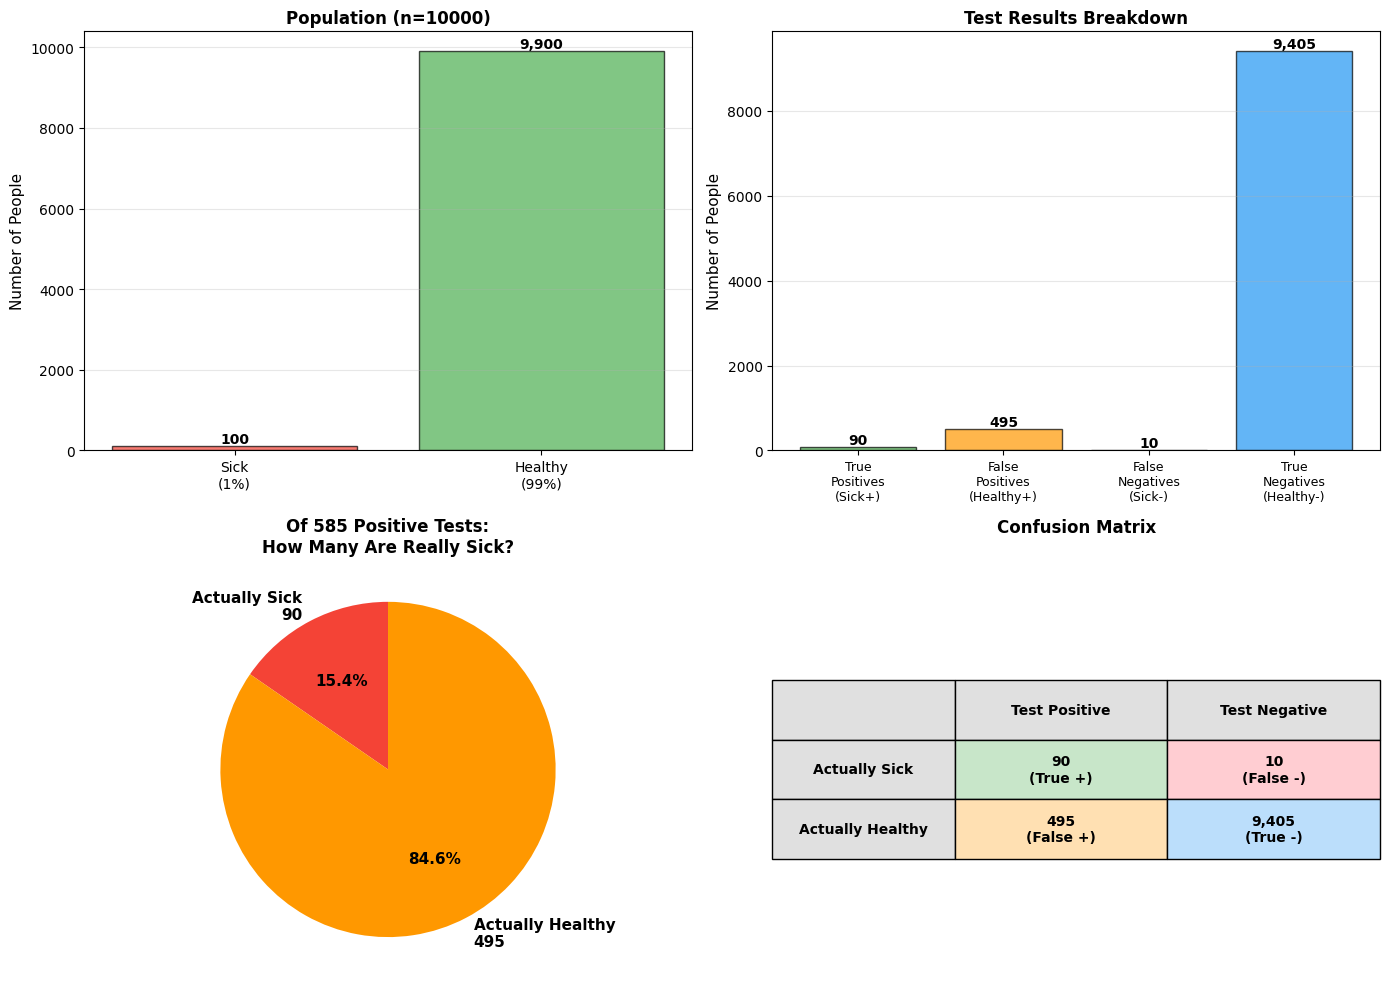


🏥 Medical Test Analysis (Bayes' Theorem in Action):

Population: 10,000 people
Disease prevalence: 1% (100 people have it)

Test characteristics:
   → Sensitivity: 90% (catches 90% of sick people)
   → False positive rate: 5% (wrongly flags 5% of healthy)

Test results:
   → True positives (sick, test +): 90
   → False positives (healthy, test +): 495
   → Total positive tests: 585

❗ THE SURPRISING RESULT:
   If you test POSITIVE, chance you're actually sick: 15.4%
   → Only ~15% of positive tests are real cases!
   → 495 out of 585 positives are false alarms

💡 Why? Because the disease is rare (1%), false positives pile up!
   → Even a 'good' test (95% specific) creates 495 false alarms
   → This is why rare disease screening can be tricky


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Population parameters
total_population = 10000
disease_rate = 0.01  # 1% have disease
test_sensitivity = 0.90  # 90% of sick people test positive (true positive rate)
test_false_positive_rate = 0.05  # 5% of healthy people test positive

# Calculate populations
sick = int(total_population * disease_rate)  # 100 sick
healthy = total_population - sick  # 9,900 healthy

# Test results
true_positives = int(sick * test_sensitivity)  # 90 sick people test positive
false_negatives = sick - true_positives  # 10 sick people test negative

false_positives = int(healthy * test_false_positive_rate)  # 495 healthy test positive
true_negatives = healthy - false_positives  # 9,405 healthy test negative

# Total positive tests
total_positives = true_positives + false_positives  # 585 total positive tests

# THE KEY QUESTION: If you test positive, what's the chance you're actually sick?
prob_sick_given_positive = true_positives / total_positives

# Visualize with tree diagram and confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Population breakdown
ax1 = axes[0, 0]
ax1.bar(['Sick\n(1%)', 'Healthy\n(99%)'], [sick, healthy], 
           color=['#F44336', '#4CAF50'], alpha=0.7, edgecolor='black')
ax1.set_ylabel('Number of People', fontsize=11)
ax1.set_title(f'Population (n={total_population})', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for i, (val, label) in enumerate(zip([sick, healthy], [sick, healthy])):
    ax1.text(i, val, f'{label:,}', ha='center', va='bottom', fontweight='bold')

# Test results breakdown
ax2 = axes[0, 1]
categories = ['True\nPositives\n(Sick+)', 'False\nPositives\n(Healthy+)', 
             'False\nNegatives\n(Sick-)', 'True\nNegatives\n(Healthy-)']
values = [true_positives, false_positives, false_negatives, true_negatives]
colors_test = ['#4CAF50', '#FF9800', '#F44336', '#2196F3']
bars = ax2.bar(range(4), values, color=colors_test, alpha=0.7, edgecolor='black')
ax2.set_xticks(range(4))
ax2.set_xticklabels(categories, fontsize=9)
ax2.set_ylabel('Number of People', fontsize=11)
ax2.set_title('Test Results Breakdown', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:,}', ha='center', va='bottom', fontweight='bold')

# The surprising result
ax3 = axes[1, 0]
pie_values = [true_positives, false_positives]
pie_labels = [f'Actually Sick\n{true_positives}', f'Actually Healthy\n{false_positives}']
ax3.pie(pie_values, labels=pie_labels, colors=['#F44336', '#FF9800'], 
       autopct='%1.1f%%', startangle=90,
       textprops={'fontsize': 11, 'fontweight': 'bold'})
ax3.set_title(f'Of {total_positives} Positive Tests:\nHow Many Are Really Sick?', 
             fontsize=12, fontweight='bold')

# Confusion matrix style visualization
ax4 = axes[1, 1]
ax4.axis('off')
table_data = [
    ['', 'Test Positive', 'Test Negative'],
    ['Actually Sick', f'{true_positives}\n(True +)', f'{false_negatives}\n(False -)'],
    ['Actually Healthy', f'{false_positives}\n(False +)', f'{true_negatives:,}\n(True -)']
]

table = ax4.table(cellText=table_data, cellLoc='center', loc='center',
                 colWidths=[0.3, 0.35, 0.35])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 3)

# Color cells
table[(0, 0)].set_facecolor('#E0E0E0')
table[(0, 1)].set_facecolor('#E0E0E0')
table[(0, 2)].set_facecolor('#E0E0E0')
table[(1, 0)].set_facecolor('#E0E0E0')
table[(2, 0)].set_facecolor('#E0E0E0')
table[(1, 1)].set_facecolor('#C8E6C9')  # True positive
table[(2, 2)].set_facecolor('#BBDEFB')  # True negative
table[(2, 1)].set_facecolor('#FFE0B2')  # False positive
table[(1, 2)].set_facecolor('#FFCDD2')  # False negative

for i in range(3):
    for j in range(3):
        table[(i, j)].set_text_props(weight='bold')

ax4.set_title('Confusion Matrix', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n🏥 Medical Test Analysis (Bayes' Theorem in Action):")
print(f"\nPopulation: {total_population:,} people")
print(f"Disease prevalence: {disease_rate:.0%} ({sick} people have it)")

print(f"\nTest characteristics:")
print(f"   → Sensitivity: {test_sensitivity:.0%} (catches {test_sensitivity:.0%} of sick people)")
print(f"   → False positive rate: {test_false_positive_rate:.0%} (wrongly flags {test_false_positive_rate:.0%} of healthy)")

print(f"\nTest results:")
print(f"   → True positives (sick, test +): {true_positives}")
print(f"   → False positives (healthy, test +): {false_positives}")
print(f"   → Total positive tests: {total_positives}")

print(f"\n❗ THE SURPRISING RESULT:")
print(f"   If you test POSITIVE, chance you're actually sick: {prob_sick_given_positive:.1%}")
print(f"   → Only ~{prob_sick_given_positive*100:.0f}% of positive tests are real cases!")
print(f"   → {false_positives} out of {total_positives} positives are false alarms")

print(f"\n💡 Why? Because the disease is rare (1%), false positives pile up!")
print(f"   → Even a 'good' test (95% specific) creates {false_positives} false alarms")
print(f"   → This is why rare disease screening can be tricky")

## Real-World Example: Fraud Detection

Credit card fraud detection using Bayes' Theorem to update beliefs based on evidence.

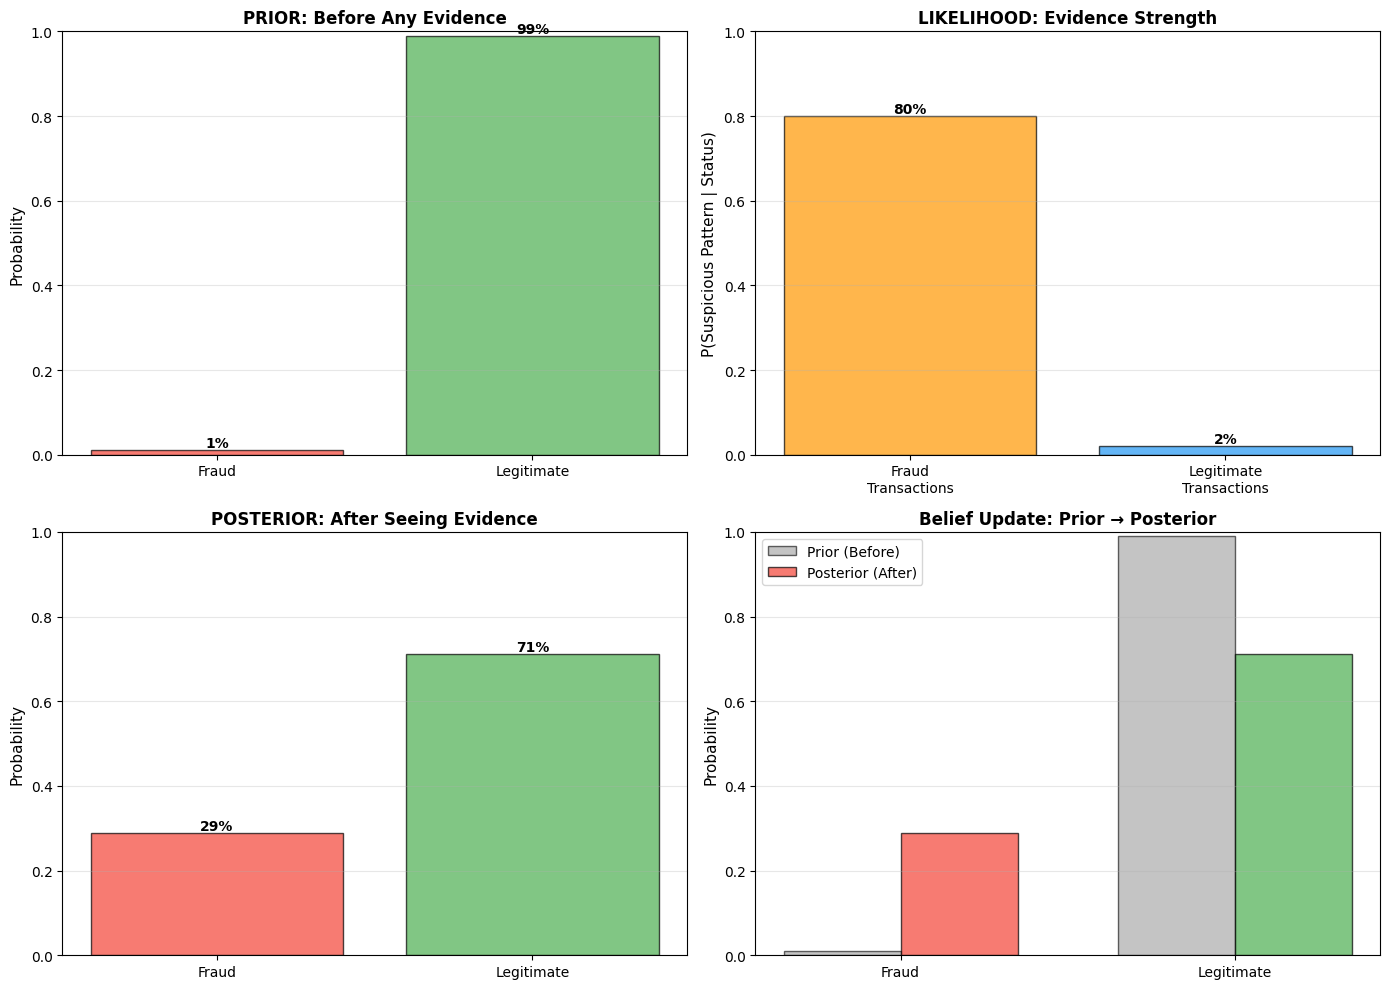


💳 Fraud Detection with Bayes' Theorem:

📊 PRIOR (Before evidence):
   → P(Fraud) = 1% (only 1% of transactions are fraud)

🔍 EVIDENCE: Transaction at 3am from overseas
   → P(Pattern | Fraud) = 80%
   → P(Pattern | Legitimate) = 2%
   → This pattern is 40x more common in fraud!

📈 POSTERIOR (After seeing evidence):
   → P(Fraud | Pattern) = 28.8%
   → Fraud probability jumped from 1% to 29%!
   → That's a 29x increase

💡 Business Decision:
   → Prior: 1% chance → Don't flag
   → Posterior: 29% chance → FLAG FOR REVIEW!
   → Bayes helps us make smarter decisions with partial information

🎯 Real-World Impact:
   → Spam filters: Update spam probability based on email content
   → Medical diagnosis: Update disease probability based on test results
   → Fraud detection: Update fraud risk based on transaction patterns


In [2]:
# Fraud detection scenario
prior_fraud_rate = 0.01  # 1% of transactions are fraud (PRIOR belief)

# Evidence: Transaction at 3am from overseas location
# P(suspicious pattern | fraud) = 80% - fraudsters often use this pattern
# P(suspicious pattern | legitimate) = 2% - legitimate users rarely do this
prob_pattern_given_fraud = 0.80
prob_pattern_given_legit = 0.02

# Apply Bayes' Theorem to get POSTERIOR probability
# P(fraud | pattern) = P(pattern | fraud) × P(fraud) / P(pattern)

# Calculate P(pattern) using law of total probability
prob_pattern = (prob_pattern_given_fraud * prior_fraud_rate + 
               prob_pattern_given_legit * (1 - prior_fraud_rate))

# Posterior probability of fraud given suspicious pattern
posterior_fraud_prob = (prob_pattern_given_fraud * prior_fraud_rate) / prob_pattern

# Visualize Bayesian updating
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Prior belief
ax1 = axes[0, 0]
ax1.bar(['Fraud', 'Legitimate'], [prior_fraud_rate, 1-prior_fraud_rate],
       color=['#F44336', '#4CAF50'], alpha=0.7, edgecolor='black')
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title('PRIOR: Before Any Evidence', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', alpha=0.3)
for i, val in enumerate([prior_fraud_rate, 1-prior_fraud_rate]):
    ax1.text(i, val, f'{val:.0%}', ha='center', va='bottom', fontweight='bold')

# Evidence likelihood
ax2 = axes[0, 1]
ax2.bar(['Fraud\nTransactions', 'Legitimate\nTransactions'], 
       [prob_pattern_given_fraud, prob_pattern_given_legit],
       color=['#FF9800', '#2196F3'], alpha=0.7, edgecolor='black')
ax2.set_ylabel('P(Suspicious Pattern | Status)', fontsize=11)
ax2.set_title('LIKELIHOOD: Evidence Strength', fontsize=12, fontweight='bold')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', alpha=0.3)
for i, val in enumerate([prob_pattern_given_fraud, prob_pattern_given_legit]):
    ax2.text(i, val, f'{val:.0%}', ha='center', va='bottom', fontweight='bold')

# Posterior belief
ax3 = axes[1, 0]
ax3.bar(['Fraud', 'Legitimate'], [posterior_fraud_prob, 1-posterior_fraud_prob],
       color=['#F44336', '#4CAF50'], alpha=0.7, edgecolor='black')
ax3.set_ylabel('Probability', fontsize=11)
ax3.set_title('POSTERIOR: After Seeing Evidence', fontsize=12, fontweight='bold')
ax3.set_ylim(0, 1)
ax3.grid(axis='y', alpha=0.3)
for i, val in enumerate([posterior_fraud_prob, 1-posterior_fraud_prob]):
    ax3.text(i, val, f'{val:.0%}', ha='center', va='bottom', fontweight='bold')

# Comparison of prior vs posterior
ax4 = axes[1, 1]
x = np.arange(2)
width = 0.35
ax4.bar(x - width/2, [prior_fraud_rate, 1-prior_fraud_rate], width, 
       label='Prior (Before)', color='#9E9E9E', alpha=0.6, edgecolor='black')
ax4.bar(x + width/2, [posterior_fraud_prob, 1-posterior_fraud_prob], width,
       label='Posterior (After)', color=['#F44336', '#4CAF50'], alpha=0.7, edgecolor='black')
ax4.set_xticks(x)
ax4.set_xticklabels(['Fraud', 'Legitimate'])
ax4.set_ylabel('Probability', fontsize=11)
ax4.set_title('Belief Update: Prior → Posterior', fontsize=12, fontweight='bold')
ax4.legend()
ax4.set_ylim(0, 1)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💳 Fraud Detection with Bayes' Theorem:")

print("\n📊 PRIOR (Before evidence):")
print(f"   → P(Fraud) = {prior_fraud_rate:.0%} (only 1% of transactions are fraud)")

print("\n🔍 EVIDENCE: Transaction at 3am from overseas")
print(f"   → P(Pattern | Fraud) = {prob_pattern_given_fraud:.0%}")
print(f"   → P(Pattern | Legitimate) = {prob_pattern_given_legit:.0%}")
print(f"   → This pattern is {prob_pattern_given_fraud/prob_pattern_given_legit:.0f}x more common in fraud!")

print("\n📈 POSTERIOR (After seeing evidence):")
print(f"   → P(Fraud | Pattern) = {posterior_fraud_prob:.1%}")
print(f"   → Fraud probability jumped from {prior_fraud_rate:.0%} to {posterior_fraud_prob:.0%}!")
print(f"   → That's a {posterior_fraud_prob/prior_fraud_rate:.0f}x increase")

print("\n💡 Business Decision:")
print(f"   → Prior: {prior_fraud_rate:.0%} chance → Don't flag")
print(f"   → Posterior: {posterior_fraud_prob:.0%} chance → FLAG FOR REVIEW!")
print(f"   → Bayes helps us make smarter decisions with partial information")

print("\n🎯 Real-World Impact:")
print("   → Spam filters: Update spam probability based on email content")
print("   → Medical diagnosis: Update disease probability based on test results")
print("   → Fraud detection: Update fraud risk based on transaction patterns")

## Summary: Bayes' Theorem

### The Formula
```
P(A|B) = P(B|A) × P(A) / P(B)

Where:
- P(A|B) = Posterior (what we want to know)
- P(B|A) = Likelihood (how strong is the evidence)
- P(A) = Prior (what we believed before)
- P(B) = Probability of seeing this evidence
```

### Key Insights
1. **Order matters:** P(Disease|Positive) ≠ P(Positive|Disease)
2. **Rare events stay rare:** Even good tests have many false positives for rare conditions
3. **Update beliefs:** Start with prior, add evidence, get posterior
4. **Context is crucial:** Base rates (priors) heavily influence final probabilities

### Real-World Applications
- **Medical testing:** Understanding true positive rates for rare diseases
- **Fraud detection:** Updating suspicion based on transaction patterns
- **Spam filtering:** Learning which words indicate spam vs legitimate email
- **Recommendation systems:** Updating product preferences based on user behavior

**Remember:** Bayes' Theorem is how we learn from data - we start with beliefs and update them with evidence!